### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

We have to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Data Preparation and Pre-processing

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from os.path import exists

#no limit of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Iterative missing value imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
# Standardization method
from sklearn.preprocessing import StandardScaler
#Import PCA
from sklearn.decomposition import PCA
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Importing stats model
import statsmodels.api as sm
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Importing RFE
from sklearn.feature_selection import RFE


In [2]:
# Importing all datasets
churn_original_test_data = pd.read_csv("test (1).csv")
churn_original_train_data = pd.read_csv("train (1).csv")

In [3]:
churn_original_test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [4]:
# The head of our train dataset
churn_original_train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
churn_original_train_data.describe([.25,.50,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,62998.2000,66498.1000,69298.02000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.0000,109.0000,109.00000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,619.9938,832.0227,1400.27664,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,615.6614,823.2367,1414.89138,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,614.9946,828.4647,1445.05480,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,345.0800,617.1850,1447.09800,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,347.9080,628.4375,1478.54090,8157.780


In [6]:
churn_original_train_data.shape

(69999, 172)

In [7]:
churn_original_test_data.shape

(30000, 171)

In [8]:
# checking the data types of the columns.
churn_original_train_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

Dataset contains date and id columns which are not required in further analysis, as they can lead to no meaningful insights. Thus dropping them.

In [9]:
to_drop = ['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7',   'date_of_last_rech_data_8', 'id', 'circle_id']
churn_original_train_data = churn_original_train_data.drop(columns = to_drop)
churn_original_train_data.shape

(69999, 161)

### Checking for Missing Values 

In [10]:
churn_original_train_data.isnull().sum()

loc_og_t2o_mou          702
std_og_t2o_mou          702
loc_ic_t2o_mou          702
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8    

In [11]:
# Checking total percentage of missing values in the dataset.
def check_train_nullpercentage(df):
    percent_null = df.isnull().sum().sum() / np.product(df.shape) * 100
    return percent_null
check_train_nullpercentage(churn_original_train_data)

14.845030173013118

There is a total of ~15% missing values in the given data set

In [12]:
# Chekcing the percentage of Null values in each of the columns
print('Percentage of Missing Values in each column are as follows:')
df_missing_columns = (round(((churn_original_train_data.isnull().sum()/len(churn_original_train_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns


Percentage of Missing Values in each column are as follows:


,null
night_pck_user_6,74.90
max_rech_data_6,74.90
arpu_2g_6,74.90
fb_user_6,74.90
total_rech_data_6,74.90
arpu_3g_6,74.90
count_rech_2g_6,74.90
av_rech_amt_data_6,74.90
count_rech_3g_6,74.90
arpu_2g_7,74.48


From the above information we can understand that missing values could be replaced with zero for all columns related to recharge, as these missing values implies months when customer didn't recharge, and hence leading to no value in related columns as well.

In [13]:
# Imputing missing values with zero
to_fill = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
churn_original_train_data[to_fill] = churn_original_train_data[to_fill].fillna(0)

The columns like fb_user* and night_pck_user_* already have '0' as a category value, thus imputing '0' for missing values will damage the accuracy of the data, thus imputing missing values in these columns with '-1', as it can serve as a new category

In [14]:
cat_col = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
churn_original_train_data[cat_col] = churn_original_train_data[cat_col].fillna(-1)

In [15]:
# checking for missing values again
miss = pd.DataFrame((churn_original_train_data.isnull().sum()/len(churn_original_train_data.index)*100).sort_values(ascending = False))
miss = miss.reset_index()
miss = miss.rename(columns = {'index': 'Column Name', 0: 'Missing Value Percentage'})
miss

,Column Name,Missing Value Percentage
0,arpu_3g_6,74.902499
1,arpu_2g_6,74.902499
2,arpu_2g_7,74.478207
3,arpu_3g_7,74.478207
4,arpu_3g_8,73.689624
5,arpu_2g_8,73.689624
6,spl_og_mou_8,5.290076
7,std_og_t2t_mou_8,5.290076
8,og_others_8,5.290076
9,loc_og_mou_8,5.290076


In [16]:
# Checking the correlation between columns with high percentage of missing values.
print("Correlation table for month 6\n\n", churn_original_train_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", churn_original_train_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", churn_original_train_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.930150            0.805494
arpu_2g_6            0.930150   1.000000            0.833773
av_rech_amt_data_6   0.805494   0.833773            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000    0.93443            0.799627
arpu_2g_7            0.934430    1.00000            0.815300
av_rech_amt_data_7   0.799627    0.81530            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.923875            0.786412
arpu_2g_8            0.923875   1.000000            0.800717
av_rech_amt_data_8   0.786412   0.800717            1.000000


<b>Conclusion</b>

From the above correlation table, it can be seen that attributes arpu_2g_* and arpu_3g_* for each month from 6 to 8 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 8 respectively. Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*

In [17]:
# selecting the columns with high percentage of missing values and dropping them as they won't be useful in analysis
drop = list(miss['Column Name'].head(6))
churn_train_data = churn_original_train_data.drop(columns = drop)
churn_train_data.shape

(69999, 155)

In [18]:
# rechecking missing values
miss_col = pd.DataFrame(churn_train_data.isnull().sum().sort_values(ascending = False))
miss_col = miss_col.reset_index()
miss_col = miss_col.rename(columns = {'index': 'Variable', 0: 'Missing Values'})
miss_col = miss_col[miss_col['Missing Values'] != 0]
miss_col

,Variable,Missing Values
0,std_ic_t2m_mou_8,3703
1,loc_og_mou_8,3703
2,loc_ic_t2m_mou_8,3703
3,spl_ic_mou_8,3703
4,loc_og_t2f_mou_8,3703
5,isd_ic_mou_8,3703
6,loc_og_t2c_mou_8,3703
7,ic_others_8,3703
8,og_others_8,3703
9,loc_og_t2t_mou_8,3703


As there are still significant amount of missing values, and no statistical method would be enough to replace them. Hence, imputing the missing values using Iterative Imputer, under the assumption that all missing values filling the missing values remaining are completely random.

In [19]:
imputer = IterativeImputer(missing_values=np.nan, random_state=0, verbose = 2)
churn_imputed = imputer.fit_transform(churn_train_data)
churn_imputed

[IterativeImputer] Completing matrix with shape (69999, 155)
[IterativeImputer] Ending imputation round 1/10, elapsed time 201.77
[IterativeImputer] Change: 3165.6695858346143, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 2/10, elapsed time 337.82
[IterativeImputer] Change: 1571.0577818668828, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 3/10, elapsed time 466.19
[IterativeImputer] Change: 357.2445487723659, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 4/10, elapsed time 588.95
[IterativeImputer] Change: 232.87934581386546, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 5/10, elapsed time 717.15
[IterativeImputer] Change: 224.73137311704454, scaled tolerance: 45.735400000000006 
[IterativeImputer] Ending imputation round 6/10, elapsed time 847.98
[IterativeImputer] Change: 215.30297010161388, scaled tolerance: 45.735400000000006 
[IterativeImpute

array([[   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ..., 1402.96,  990.97,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [20]:
churn_imputed.shape

(69999, 155)

In [21]:
churn_train_imputed = pd.DataFrame(churn_imputed, columns=churn_train_data.columns)
churn_train_imputed.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1958.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,710.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94

In [22]:
churn_train_data = churn_train_imputed
check_train_nullpercentage(churn_train_data)

0.0

Columns like fb_user_* and night_pck_user_* actually specifies whether a special pask is there for the subscriber, and can be treated as categorical colums. Since, the only values contained in them are 0, 1 converting the column to int64 type, so that we can treat them as categorical variable with dummy values.

In [23]:
cat_col = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
for i in range(len(cat_col)):
    churn_original_train_data[cat_col[i]] =   churn_original_train_data[cat_col[i]].astype('int64')

In [24]:
# checking the data types of the columns.
churn_original_train_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 161 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loc_og_t2o_mou      float64
 1   std_og_t2o_mou      float64
 2   loc_ic_t2o_mou      float64
 3   arpu_6              float64
 4   arpu_7              float64
 5   arpu_8              float64
 6   onnet_mou_6         float64
 7   onnet_mou_7         float64
 8   onnet_mou_8         float64
 9   offnet_mou_6        float64
 10  offnet_mou_7        float64
 11  offnet_mou_8        float64
 12  roam_ic_mou_6       float64
 13  roam_ic_mou_7       float64
 14  roam_ic_mou_8       float64
 15  roam_og_mou_6       float64
 16  roam_og_mou_7       float64
 17  roam_og_mou_8       float64
 18  loc_og_t2t_mou_6    float64
 19  loc_og_t2t_mou_7    float64
 20  loc_og_t2t_mou_8    float64
 21  loc_og_t2m_mou_6    float64
 22  loc_og_t2m_mou_7    float64
 23  loc_og_t2m_mou_8    float64
 24  loc_og_t2f_mou_6    float64

Now, all columns are of numeric type - Float and Integer only. Hence data types seems to be good enough to proceed with further analysis.

### Check Columns for Unique value
lets check for column which having same value for entire data. 

In [25]:
samevaluecols = []
for col in churn_train_data.columns:
    if churn_train_data[col].nunique() ==1:
        samevaluecols+=[col]
    print('{} : {}'.format(col,churn_train_data[col].nunique()))

loc_og_t2o_mou : 1
std_og_t2o_mou : 1
loc_ic_t2o_mou : 1
arpu_6 : 61615
arpu_7 : 61425
arpu_8 : 60194
onnet_mou_6 : 22825
onnet_mou_7 : 22763
onnet_mou_8 : 23428
offnet_mou_6 : 29022
offnet_mou_7 : 28826
offnet_mou_8 : 29698
roam_ic_mou_6 : 8074
roam_ic_mou_7 : 6927
roam_ic_mou_8 : 7955
roam_og_mou_6 : 9336
roam_og_mou_7 : 7992
roam_og_mou_8 : 8918
loc_og_t2t_mou_6 : 14259
loc_og_t2t_mou_7 : 14046
loc_og_t2t_mou_8 : 14999
loc_og_t2m_mou_6 : 20616
loc_og_t2m_mou_7 : 20328
loc_og_t2m_mou_8 : 21319
loc_og_t2f_mou_6 : 6144
loc_og_t2f_mou_7 : 6052
loc_og_t2f_mou_8 : 7014
loc_og_t2c_mou_6 : 4713
loc_og_t2c_mou_7 : 4790
loc_og_t2c_mou_8 : 5907
loc_og_mou_6 : 25077
loc_og_mou_7 : 24699
loc_og_mou_8 : 25653
std_og_t2t_mou_6 : 17322
std_og_t2t_mou_7 : 17432
std_og_t2t_mou_8 : 18186
std_og_t2m_mou_6 : 18827
std_og_t2m_mou_7 : 18921
std_og_t2m_mou_8 : 19671
std_og_t2f_mou_6 : 4842
std_og_t2f_mou_7 : 4678
std_og_t2f_mou_8 : 5648
std_og_t2c_mou_6 : 1
std_og_t2c_mou_7 : 1
std_og_t2c_mou_8 : 1
std_og_

In [26]:
samevaluecols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

#### Dropping these columns as they are having single value for the entire data. Hence there will be no impact of these column on the data analysis.

In [27]:
# Dropping columns with non-unique values
churn_train_data = churn_train_data.drop(churn_train_data[samevaluecols], axis=1)
churn_train_data.shape

(69999, 146)

In [28]:
# Check if there are any duplicate value still exists in data
churn_train_data.duplicated().sum()

0

In [29]:
churn_train_data.describe([.25,.50,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
arpu_6,69999.0,283.134365,334.213918,-2258.709000,93.581,197.484,370.791000,619.993800,832.022700,1400.276640,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715000,86.714,191.588,365.369500,615.661400,823.236700,1414.891380,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808000,84.095,192.234,369.909000,614.994600,828.464700,1445.054800,33543.624
onnet_mou_6,69999.0,124.053877,297.374210,-138.377666,5.430,30.830,113.100000,331.766000,598.600000,1429.040400,7376.710
onnet_mou_7,69999.0,125.142291,308.378086,-566.302315,4.910,29.160,108.940000,334.886000,608.878000,1461.342200,8157.780
onnet_mou_8,69999.0,120.038213,308.445010,-766.341580,4.110,27.840,106.280000,326.298000,596.125000,1448.891000,10752.560
offnet_mou_6,69999.0,196.855040,310.651245,0.000000,36.880,103.830,223.540000,468.898000,719.500000,1520.310000,8362.360
offnet_mou_7,69999.0,193.972857,316.640763,-373.159516,33.980,98.460,218.370000,470.054000,731.602000,1517.838600,7043.980
offnet_mou_8,69999.0,194.189644,315.564724,-297.616042,34.390,101.660,216.435000,467.636000,715.915000,1492.232400,14007.340
roam_ic_mou_6,69999.0,10.625927,56.492605,-33.678261,0.000,0.000,0.000000,26.137499,41.480000,214.681200,2850.980


### Exploratory Data Analysis

0.0    89.811283
1.0    10.188717
Name: churn_probability, dtype: float64


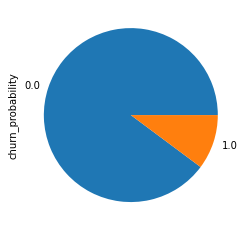

In [30]:
# lets find out churn/non churn percentage
print((churn_train_data['churn_probability'].value_counts()/len(churn_train_data))*100)
((churn_train_data['churn_probability'].value_counts()/len(churn_train_data))*100).plot(kind="pie")
plt.show()

In [31]:
# Function to plot count plots
def category_counts(col, df):
    plt.figure(figsize=(12,4));
    sns.countplot(x=df[col],palette='Dark2');
    plt.xlabel(col);
    plt.ylabel('Counts');
    plt.title(f"{col} Value Counts");
    plt.show()

##### Discrete Numerical Columns
Finding out the columns whose unique value count is < 20

In [32]:
colls = []
for col in churn_train_data.columns:
    if churn_train_data[col].nunique() <20:
        colls+=[col]
        print('{} : {}'.format(col,churn_train_data[col].nunique()))

night_pck_user_6 : 3
night_pck_user_7 : 3
night_pck_user_8 : 3
monthly_2g_6 : 5
monthly_2g_7 : 6
monthly_2g_8 : 6
monthly_3g_6 : 10
monthly_3g_7 : 13
monthly_3g_8 : 12
fb_user_6 : 3
fb_user_7 : 3
fb_user_8 : 3
churn_probability : 2


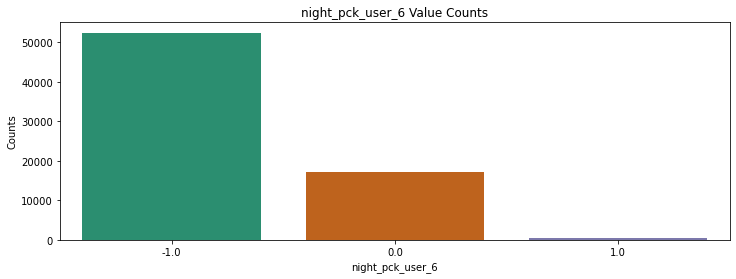

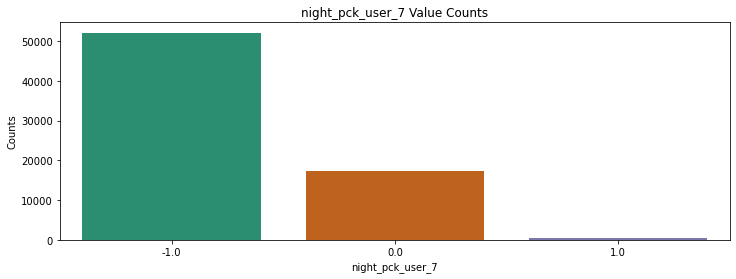

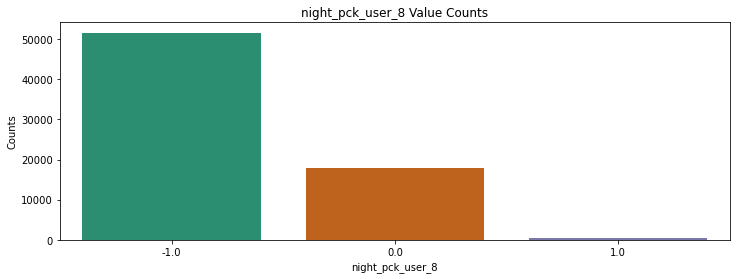

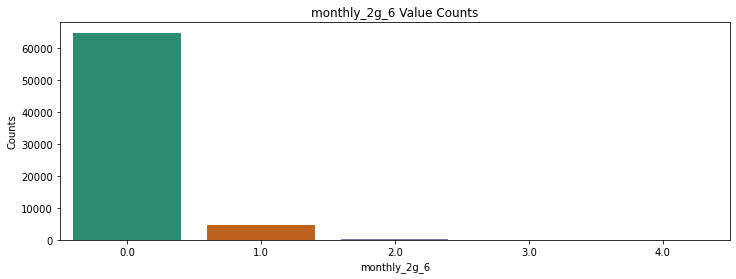

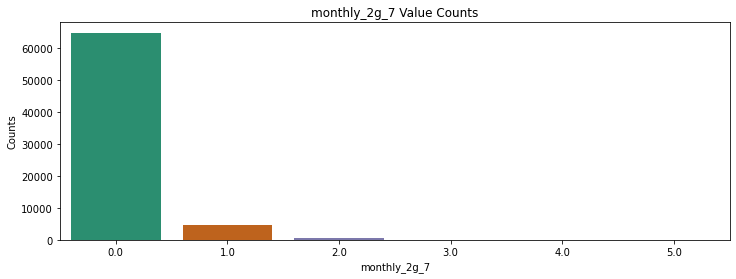

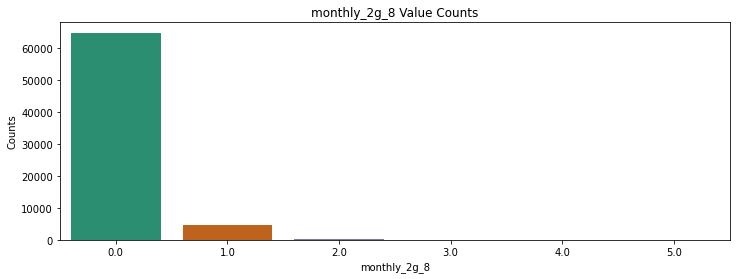

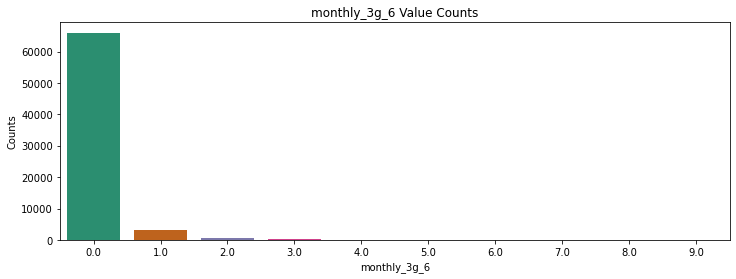

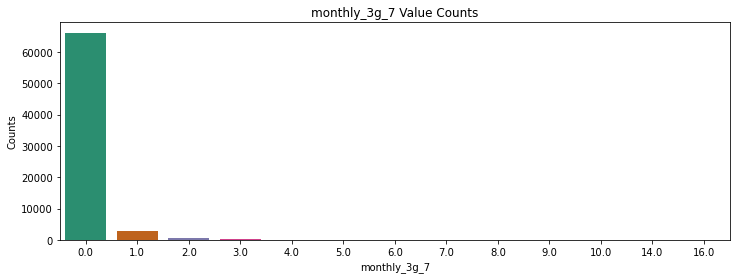

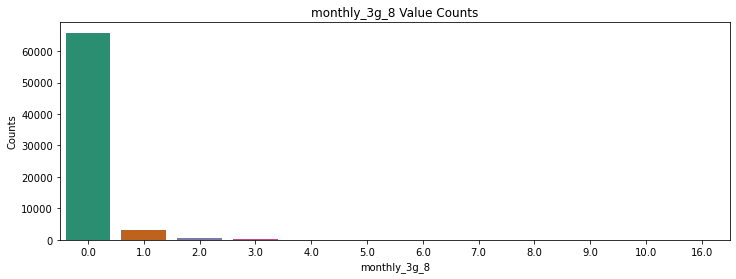

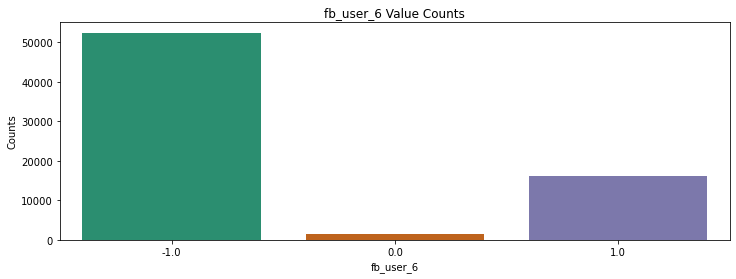

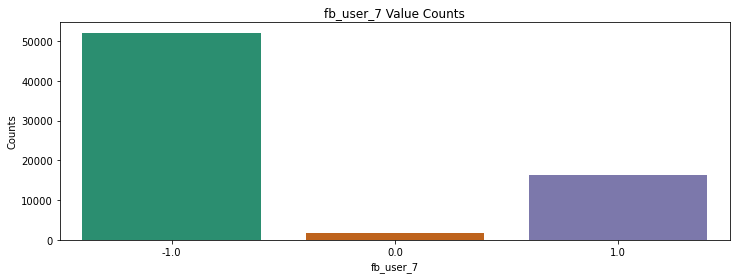

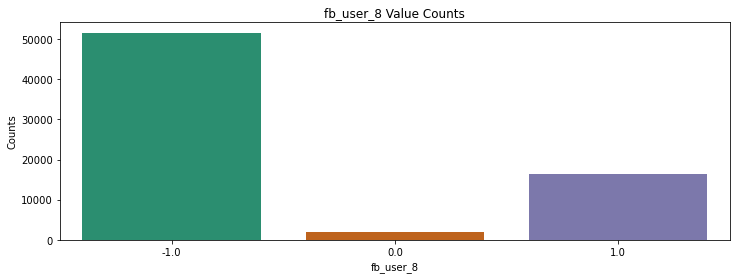

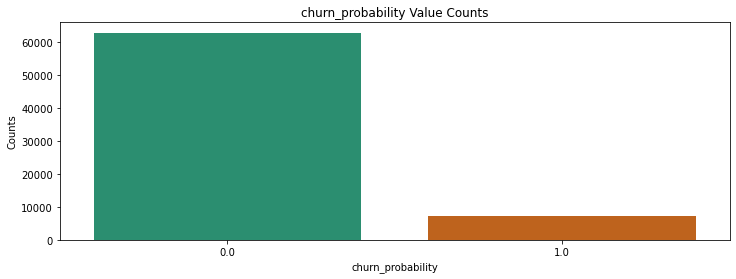

In [33]:
for col in colls:
    category_counts(col,churn_train_data)

In [34]:
#list out all derived columns for EDA, as we will have to drop these for further analysis
derived_columns=[]

#### Derive new features Tenure

In [35]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
churn_train_data['tenure'] = (churn_train_data['aon']/30).round(0)

In [36]:
derived_columns.append('tenure')

In [37]:
# List the columns of total mou, rech_num and rech_amt
[total for total in churn_train_data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

##### Deriving new column decrease_mou_action
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [38]:
# Total mou at good phase incoming and outgoing
churn_train_data['total_mou_good'] = (churn_train_data['total_og_mou_6'] + churn_train_data['total_ic_mou_6'])

# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
churn_train_data['avg_mou_action'] = (churn_train_data['total_og_mou_7'] + churn_train_data['total_og_mou_8'] + churn_train_data['total_ic_mou_7'] + churn_train_data['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
churn_train_data['diff_mou'] = churn_train_data['avg_mou_action'] - churn_train_data['total_mou_good']

# Checking whether the mou has decreased in action phase
churn_train_data['decrease_mou_action'] = np.where((churn_train_data['diff_mou'] < 0), 1, 0)

In [39]:
derived_columns.append('total_mou_good')
derived_columns.append('avg_mou_action')
derived_columns.append('diff_mou')
derived_columns.append('decrease_mou_action')

#####  Deriving new column decrease_rech_num_action
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [40]:
# Avg rech number at action phase
churn_train_data['avg_rech_num_action'] = (churn_train_data['total_rech_num_7'] + churn_train_data['total_rech_num_8'])/2

# Difference total_rech_num_6 and avg_rech_action
churn_train_data['diff_rech_num'] = churn_train_data['avg_rech_num_action'] - churn_train_data['total_rech_num_6']

# Checking if rech_num has decreased in action phase
churn_train_data['decrease_rech_num_action'] = np.where((churn_train_data['diff_rech_num'] < 0), 1, 0)

In [41]:
derived_columns.append('avg_rech_num_action')
derived_columns.append('decrease_rech_num_action')
derived_columns.append('diff_rech_num')

###### Deriving new column decrease_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [42]:
# Avg rech_amt in action phase
churn_train_data['avg_rech_amt_action'] = (churn_train_data['total_rech_amt_7'] + churn_train_data['total_rech_amt_8'])/2

# Difference of action phase rech amt and good phase rech amt
churn_train_data['diff_rech_amt'] = churn_train_data['avg_rech_amt_action'] - churn_train_data['total_rech_amt_6']

# Checking if rech_amt has decreased in action phase
churn_train_data['decrease_rech_amt_action'] = np.where((churn_train_data['diff_rech_amt'] < 0), 1, 0) 

In [43]:
derived_columns.append('avg_rech_amt_action')
derived_columns.append('diff_rech_amt')
derived_columns.append('decrease_rech_amt_action')

##### Deriving new column decrease_arpu_action
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [44]:
# ARUP in action phase
churn_train_data['avg_arpu_action'] = (churn_train_data['arpu_7'] + churn_train_data['arpu_8'])/2

# Difference of good and action phase ARPU
churn_train_data['diff_arpu'] = churn_train_data['avg_arpu_action'] - churn_train_data['arpu_6']

# Checking whether the arpu has decreased on the action month
churn_train_data['decrease_arpu_action'] = np.where(churn_train_data['diff_arpu'] < 0, 1, 0)

In [45]:
derived_columns.append('avg_arpu_action')
derived_columns.append('diff_arpu')
derived_columns.append('decrease_arpu_action')

##### Deriving new column decrease_vbc_action
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [46]:
# VBC in action phase
churn_train_data['avg_vbc_3g_action'] = (churn_train_data['jul_vbc_3g'] + churn_train_data['aug_vbc_3g'])/2

# Difference of good and action phase VBC
churn_train_data['diff_vbc'] = churn_train_data['avg_vbc_3g_action'] - churn_train_data['jun_vbc_3g']

# Checking whether the VBC has decreased on the action month
churn_train_data['decrease_vbc_action'] = np.where(churn_train_data['diff_vbc'] < 0 , 1, 0)

In [47]:
derived_columns.append('avg_vbc_3g_action')
derived_columns.append('diff_vbc')
derived_columns.append('decrease_vbc_action')

### Univariate Analysis

In [48]:
# Function to plot histogram for all derived variables
def hist(col, df):
    plt.figure(figsize=(12,4));
    sns.distplot(df[col]);
    plt.xlabel(col);
    plt.title(f"{col} Histogram");
    plt.show()

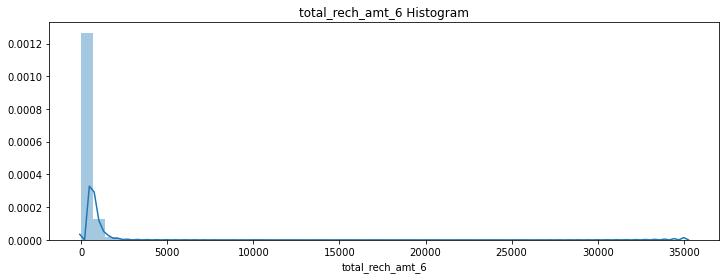

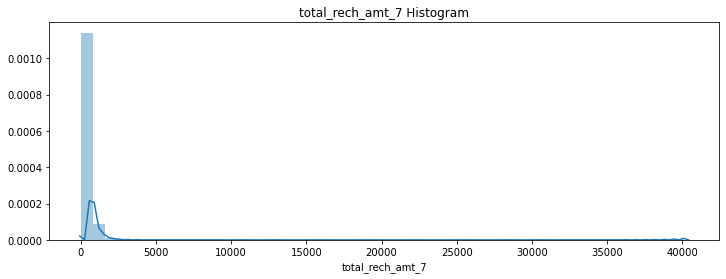

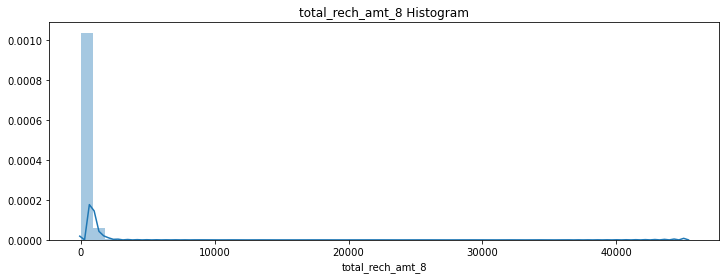

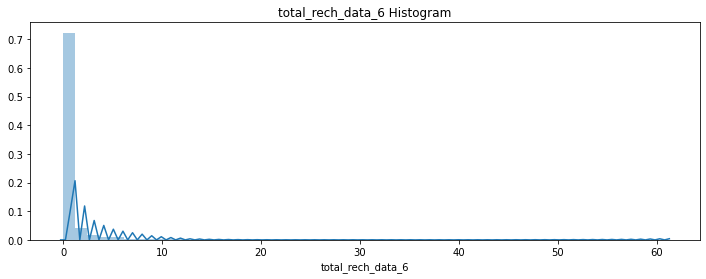

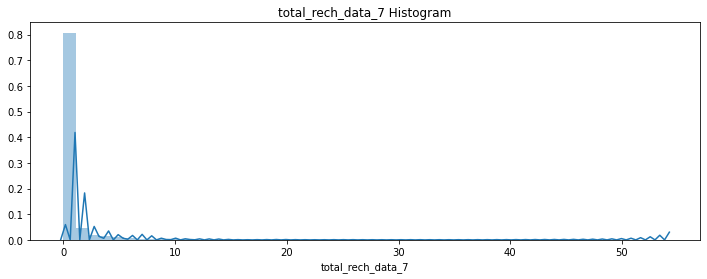

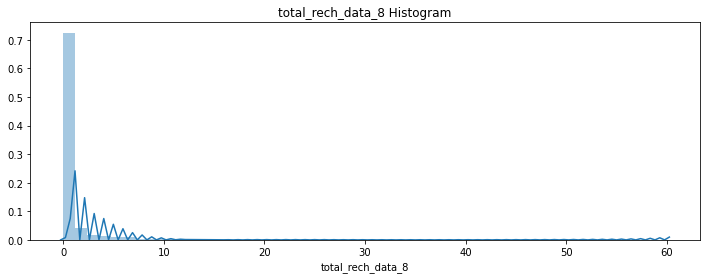

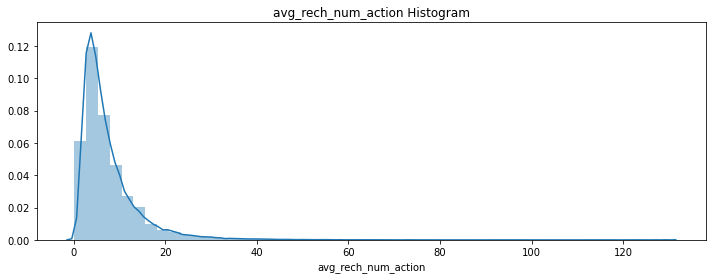

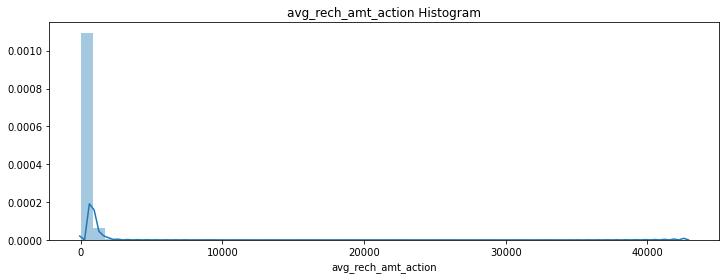

In [49]:
# Plotting histogram for important continuos numerical variables
cont_num = [ 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'avg_rech_num_action', 'avg_rech_amt_action']
for col in cont_num:
    hist(col,churn_train_data)

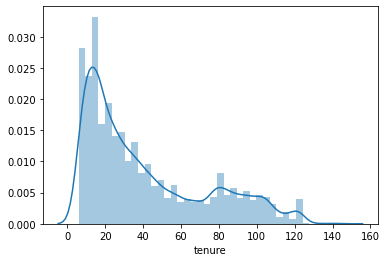

In [50]:
# Checking the distribution of the tenure variable
sns.distplot(churn_train_data['tenure'],bins=40)
plt.show()

Churn rate on the basis whether the customer decreased her/his MOU in action month


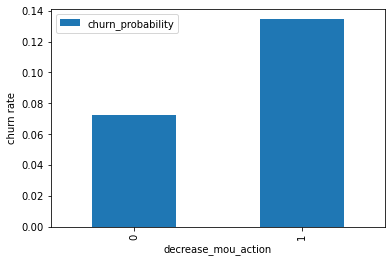

In [51]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- The churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.


##### Churn rate on the basis whether the customer decreased her/his number of recharge in action month

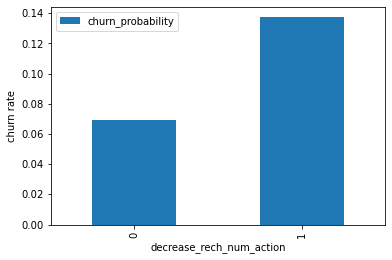

In [52]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.


##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

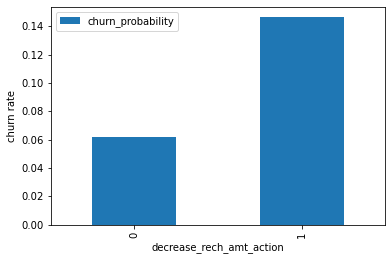

In [53]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

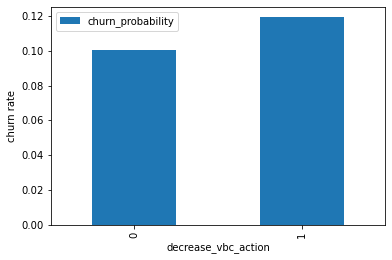

In [54]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [55]:
# Creating churn dataframe
data_churn = churn_train_data[churn_train_data['churn_probability'] == 1]
# Creating not churn dataframe
data_non_churn = churn_train_data[churn_train_data['churn_probability'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

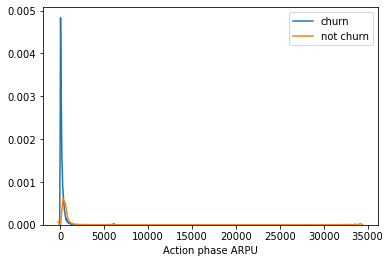

In [56]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'], label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'], label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

<b>Conclusion</b>

- Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

- ARPU for the not churned customers is mostly densed on the 0 to 1000.

###### Analysis of the minutes of usage MOU (churn and not churn) in the action phase


[Text(0.5, 0, 'Action phase MOU')]

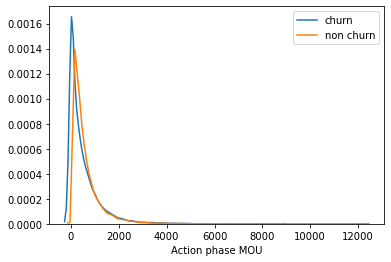

In [57]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2000 range. Higher the MOU, lesser the churn probability.



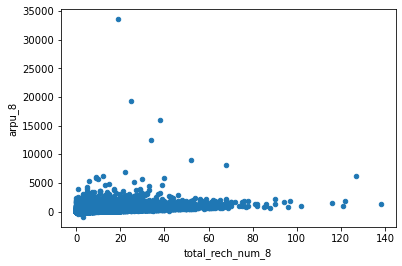

In [58]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_train_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

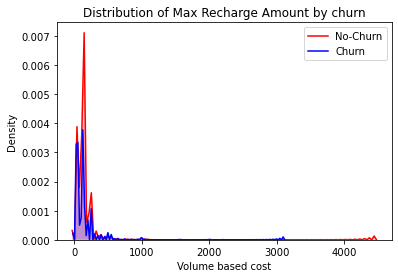

In [59]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(churn_train_data.max_rech_amt_8[(churn_train_data["churn_probability"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(churn_train_data.max_rech_amt_8[(churn_train_data["churn_probability"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

### Bivariate Analysis

In [60]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_train_data['tenure_range'] = pd.cut(churn_train_data['tenure'], tn_range, labels=tn_label)
churn_train_data['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

In [61]:
derived_columns.append('tenure_range')

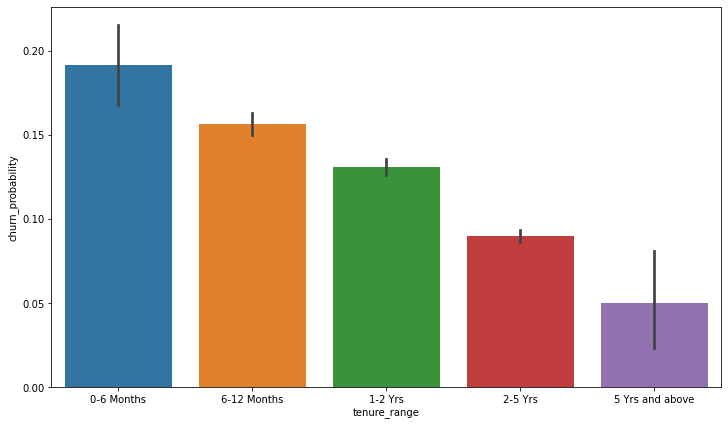

In [62]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=churn_train_data)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.


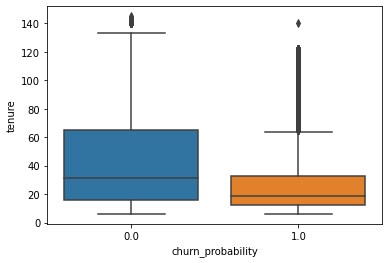

In [63]:
sns.boxplot(x = churn_train_data.churn_probability, y = churn_train_data.tenure)
plt.show()

From the above plot , its clear tenured customers do no churn and they keep availing telecom services

<b>Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase</b>

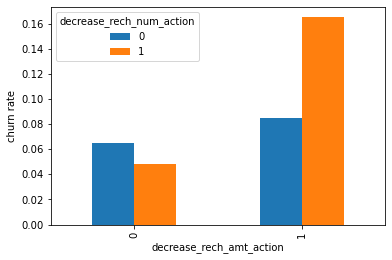

In [64]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

<b>Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase</b>

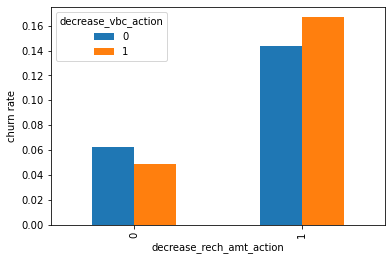

In [65]:
churn_train_data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

<b>Conclusion</b>

- Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

<b>Analysis of recharge amount and number of recharge in action month</b>

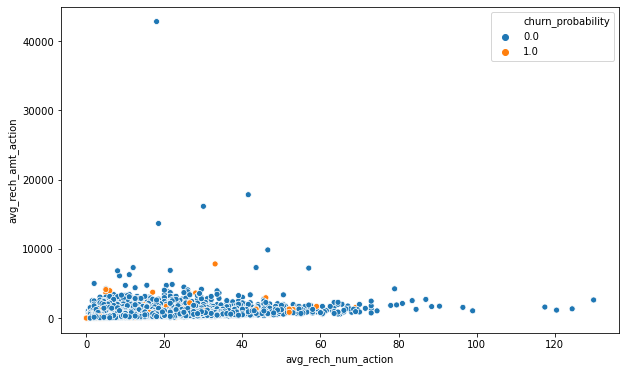

In [66]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn_probability', data=churn_train_data)

<b>Conclusion</b>

- We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping few derived columns, which are not required in further analysis


In [67]:
print(derived_columns)

['tenure', 'total_mou_good', 'avg_mou_action', 'diff_mou', 'decrease_mou_action', 'avg_rech_num_action', 'decrease_rech_num_action', 'diff_rech_num', 'avg_rech_amt_action', 'diff_rech_amt', 'decrease_rech_amt_action', 'avg_arpu_action', 'diff_arpu', 'decrease_arpu_action', 'avg_vbc_3g_action', 'diff_vbc', 'decrease_vbc_action', 'tenure_range']


In [68]:
churn_train_data = churn_train_data.drop(derived_columns, axis=1)

Text(0.5, 1.0, 'Features Correlation with Churn variable')

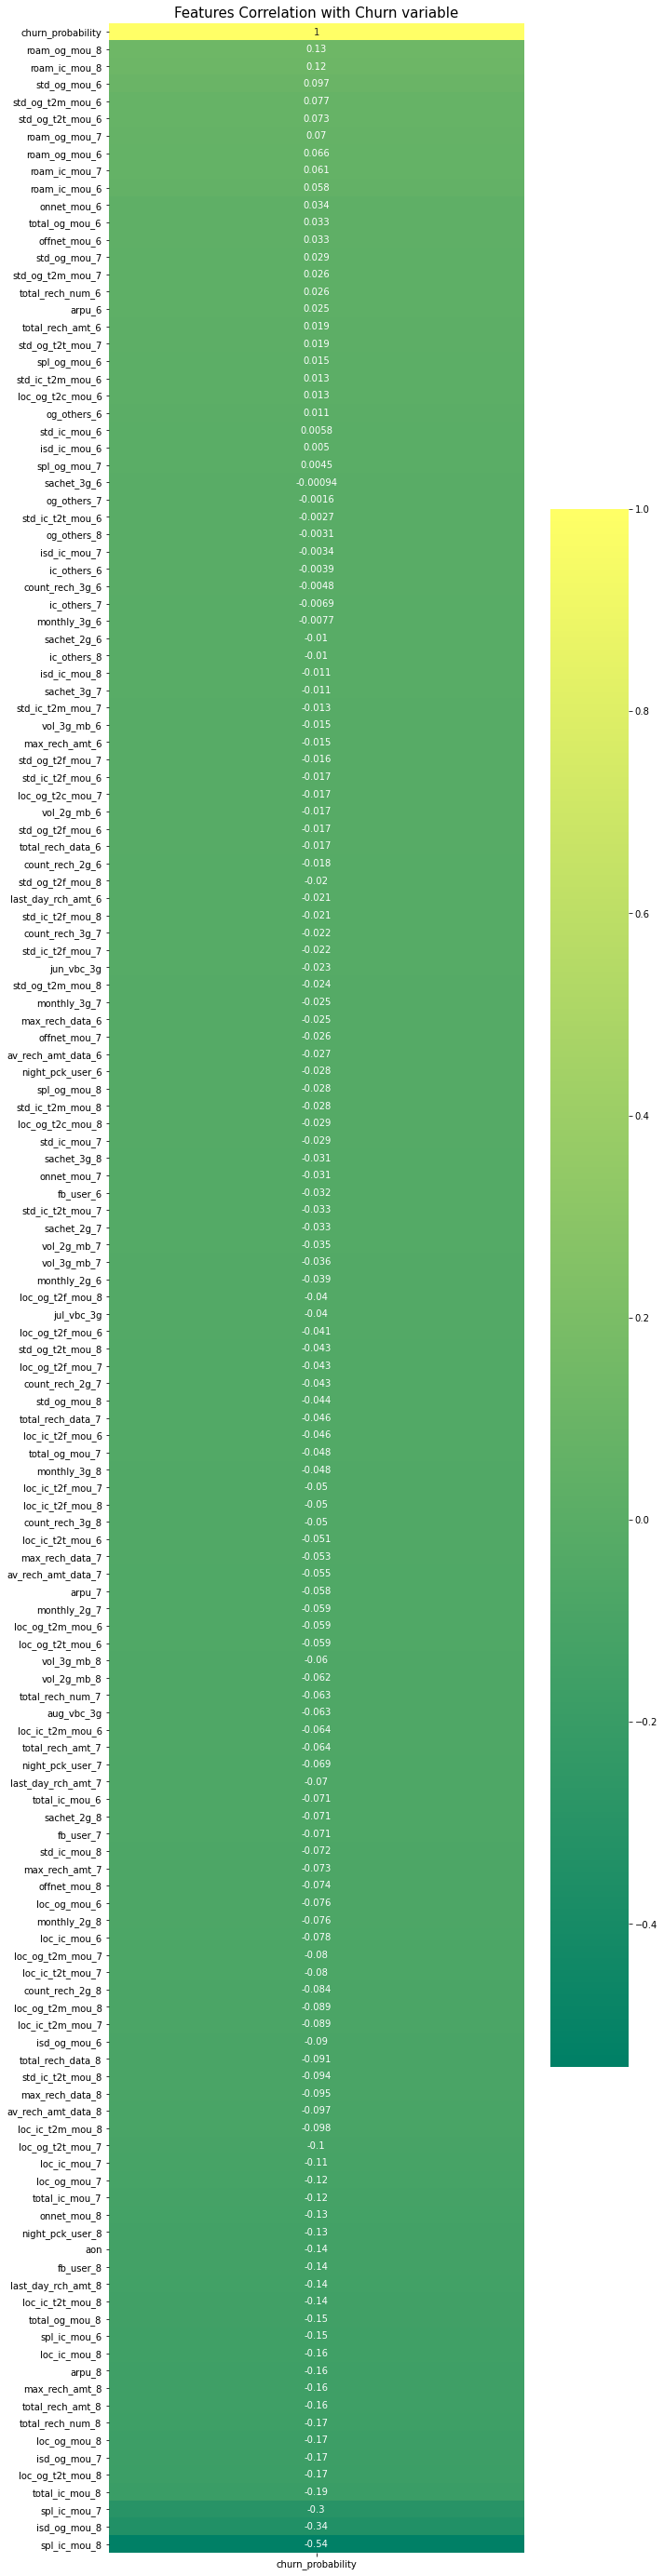

In [69]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(churn_train_data.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlation with Churn variable", fontsize=15)

### User Defined Functions

In [70]:
def confusion_matrix_plot(matrix=None,classes=None,name='Logistic Regression'):
    plt.figure(figsize=(5,5))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax.set_xlabel('Predicted labels',fontsize = 15,fontweight = 3);
    ax.set_ylabel('True labels',fontsize = 15,fontweight = 3); 
    ax.set_title('Confusion Matrix of '+name,fontsize = 25,fontweight = 5); 
    ax.xaxis.set_ticklabels(classes); 
    ax.yaxis.set_ticklabels(classes[::-1]);
    plt.show()

In [71]:
 def cal_score(x_test=None,y_test=None,model=None,name=None):
    predictions = model.predict(x_test)
    labels=y_test
    matrix = confusion_matrix(labels,predictions)
    print(matrix)
    print('\n')
    
    f1 = f1_score(predictions, labels, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    classes=[False,True]
    print(classification_report(predictions, labels, labels=classes))
    
    confusion_matrix_plot(matrix = matrix,classes = classes,name = name)

In [72]:
# Cheking the dataset before proceeding with model building
churn_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 146 entries, arpu_6 to churn_probability
dtypes: float64(146)
memory usage: 78.0 MB


No need to create dummy variables as no object data type columns are present in the data frame.

## Train-Test Split

In [73]:
X = churn_train_data.drop(['churn_probability'],axis=1)
y=churn_train_data['churn_probability']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

## Feature Scaling

In [75]:
# Instantiate the Scaler
scaler = StandardScaler()
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
18874,-0.516727,-0.348658,-0.322476,-0.377938,-0.314348,-0.234301,-0.263564,-0.083566,0.100712,-0.189032,-0.121910,-0.155338,-0.210296,-0.164511,-0.167905,-0.191907,-0.074358,0.064166,0.089483,0.511496,0.913147,-0.290327,-0.286683,-0.293450,-0.205171,-0.146294,-0.215147,-0.076833,0.252196,0.576696,-0.316412,-0.314412,-0.313469,-0.320403,-0.347144,-0.339569,-0.139873,-0.135407,-0.141941,-0.419151,-0.435822,-0.429994,0.100662,0.087755,0.115085,-0.252398,-0.211389,-0.278957,-0.103303,-0.016759,-0.014572,-0.386817,-0.239764,-0.064467,-0.123117,-0.079567,-0.054816,0.140234,0.278620,0.448757,0.205109,-0.227148,-0.318441,0.053063,0.096347,0.214219,-0.161318,-0.151941,-0.157055,-0.037083,-0.165370,-0.097178,-0.023233,0.847193,-0.126625,-0.111860,-0.073054,-0.168536,-0.012445,0.031830,0.099425,0.200218,0.198461,0.23305,-0.117037,-0.127021,-0.137319,-0.070369,-0.074231,-0.081077,-0.364236,-0.242287,-0.585200,-0.508929,0.032733,-0.328994,-0.116756,0.217126,0.183646,-0.336839,0.752637,0.668066,-0.347237,-0.351162,-0.349641,-0.411666,-0.41687,-0.418803,-0.305327,-0.313427,-0.318095,-0.215184,-0.211208,-0.207186,-0.390806,-0.391875,-0.394176,-0.239486,-0.240053,-0.23154,-0.236483,-0.23749,-0.242538,-0.56893,-0.580253,-0.589427,-0.267654,-0.272716,-0.271705,-0.258273,-0.268193,-0.273947,-0.211829,-0.202658,-0.21126,-0.129025,-0.128343,-0.124488,-0.569607,-0.579787,-0.586554,1.447769,-0.253135,-0.249159,-0.229571
34295,-0.282979,-0.148382,-0.173348,-0.177740,-0.280269,-0.168690,-0.231931,0.090904,-0.065195,-0.189032,-0.121910,-0.155338,-0.210296,-0.164511,-0.167905,0.192764,-0.007148,0.190141,0.186354,0.864837,0.550362,-0.194908,-0.077339,-0.293450,-0.205171,-0.146294,-0.215147,0.225995,0.524128,0.440900,-0.315567,-0.314412,-0.313081,-0.345858,-0.347144,-0.336906,-0.139873,-0.136680,-0.141941,-0.435489,-0.435847,-0.427974,0.100662,0.087755,0.115085,-0.199588,-0.15113

In [76]:
#No need to fit scaler on the test set. We only transform the test set, as model is already fitted on the train set.
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
59030,1.331849,1.363094,0.022116,-0.043044,-0.142655,-0.384916,0.377688,0.211082,-0.571496,0.808944,-0.121910,0.161843,1.914188,-0.164511,-0.053233,-0.207120,-0.195464,-0.232215,-0.336861,-0.431744,-0.584202,-0.290327,-0.286683,-0.240605,1.294726,8.093160,-0.215147,-0.354416,-0.406501,-0.515976,-0.069450,-0.038811,-0.313469,0.298627,0.280569,-0.339569,-0.139873,-0.136680,-0.141941,0.150431,0.157427,-0.429994,0.100662,0.087755,0.115085,0.093442,3.188645,-0.268037,-0.103303,-0.016759,-0.014572,-0.054808,0.090788,-0.621144,-0.052827,-0.184275,-0.284479,-0.502883,0.202379,-0.411434,-0.320202,-0.311206,-0.184694,-0.410563,-0.028376,-0.462689,-0.128968,0.029162,-0.157055,0.024464,0.600867,-0.059175,-0.124432,0.313213,-0.126625,-0.066572,0.513935,-0.140013,-0.390169,0.263991,-0.462954,0.200218,0.198461,0.233050,-0.103430,0.404076,-0.137319,-0.070369,0.013904,-0.081077,0.348176,1.453708,-0.447441,0.947578,1.337985,0.054184,0.768758,1.230904,0.730673,-0.132484,-0.625041,0.371736,0.212793,4.741202,0.149516,2.176649,2.830512,2.103710,0.346215,1.462500,0.278488,-0.215184,9.021884,-0.207186,1.224097,1.765527,1.118845,0.725534,1.653763,8.902295,2.959464,10.723064,0.004948,1.648987,3.828121,1.604870,3.131718,-0.272716,3.085990,-0.258273,1.533038,-0.273947,-0.211829,2.373900,-0.21126,-0.129025,9.323551,-0.124488,1.809066,1.781234,1.773680,-0.612838,1.360781,10.339694,6.758650
38151,0.354007,-0.216765,-0.738559,0.129455,-0.150672,-0.384756,1.121033,0.219052,-0.570494,-0.189032,-0.119611,-0.141314,-0.210296,-0.127548,-0.152921,-0.082954,-0.140608,-0.232215,-0.482547,-0.519647,-0.547721,-0.290327,-0.286683,-0.293450,-0.205171,-0.146294,-0.215147,-0.369571,-0.425565,-0.496704,0.223462,-0.086862,-0.313469,1.737356,0.599873,-0.332443,-0.139873,-0.136680,-0.141941,1.293246,0.337095,-0.425255,0.100662,0.087755,0.115085,-0.253042,-0.211389,-0.278957,-0.103303,-0.016759,-0.014

### Model with PCA

In [77]:
# Instantiate PCA
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [78]:
# Principal components
pca.components_

array([[ 1.59341453e-01,  1.68983711e-01,  1.59912951e-01, ...,
         9.94543044e-02,  1.02469385e-01,  9.47299063e-02],
       [ 8.28651449e-02,  8.58496426e-02,  7.83901848e-02, ...,
        -9.39488895e-02, -9.85818929e-02, -9.19052619e-02],
       [-4.81639132e-02, -6.36288587e-02, -5.59482323e-02, ...,
         1.51723244e-02,  1.57189726e-02,  1.55539949e-02],
       ...,
       [-0.00000000e+00, -1.18008994e-16,  1.42843064e-16, ...,
         7.59637104e-18,  1.00487071e-17,  2.29727366e-17],
       [ 0.00000000e+00, -1.03029314e-16, -5.58550844e-17, ...,
        -5.00630765e-17,  2.90846658e-17, -2.84934246e-17],
       [ 0.00000000e+00, -2.76474535e-16, -8.74474958e-17, ...,
         9.79743101e-18,  1.05025162e-18,  2.80425876e-17]])

In [79]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.12467478 0.21928823 0.28397264 0.33132225 0.37011192 0.39937409
 0.42794217 0.45482323 0.479722   0.50146789 0.52293771 0.54350654
 0.56366276 0.5832522  0.60073299 0.6165691  0.63163543 0.64634121
 0.66060645 0.67321964 0.68544104 0.69759834 0.70939371 0.72086653
 0.7319241  0.7420235  0.75132575 0.76033899 0.76873205 0.7769116
 0.7848035  0.79239272 0.79965945 0.80667664 0.81349634 0.82022122
 0.82670904 0.83306645 0.83923044 0.84522496 0.85113575 0.85690721
 0.86259125 0.86766989 0.87258413 0.87735783 0.88195158 0.88646477
 0.89087363 0.89512798 0.89900977 0.90282576 0.90638374 0.90980843
 0.91305632 0.91621329 0.91934111 0.92234671 0.9252715  0.92814418
 0.93097602 0.93371133 0.93638728 0.93900692 0.9414796  0.94392979
 0.94626794 0.948567   0.9508359  0.95304725 0.95523972 0.95738482
 0.95948018 0.96149343 0.96345847 0.96537435 0.96727033 0.96912275
 0.97093704 0.97273796 0.97444368 0.97612154 0.97774478 0.97934468
 0.98091365 0.98242931 0.98387278 0.98522413 0.98654958 0.98785

Text(0, 0.5, 'Cumulative Variance')

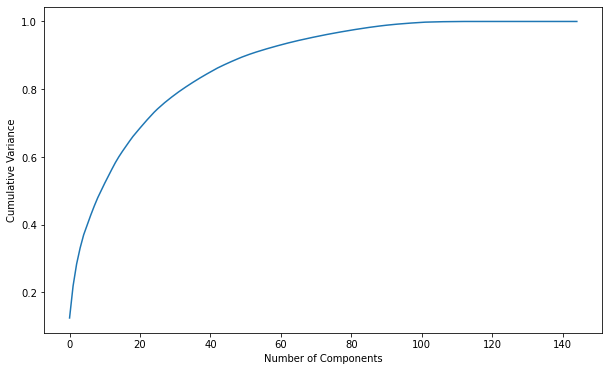

In [80]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

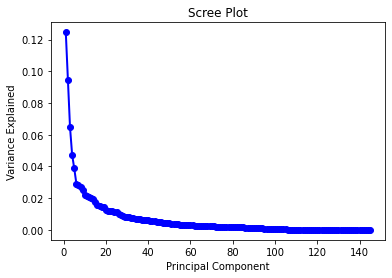

In [81]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

We can see that 70 components explain amost more than 90% variance of the data. So we will perform PCA with 70 components.



#### Performing PCA with 70 components


In [82]:
# Instantiate PCA with 70 components
pca_final = IncrementalPCA(n_components=70)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [83]:
X_test_pca = pca_final.transform(X_test)

Emphasize Sensitivity/Recall than Accuracy
We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

### Logistic regression with PCA


Tuning hyperparameter C

- C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [84]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [85]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.341673,0.019035,0.006831,0.000732,0.01,{'C': 0.01},0.442116,0.437992,0.434292,0.436326,0.418489,0.433843,0.008096,6,0.430703,0.432234,0.434957,0.435968,0.438734,0.434519,0.002823
1,0.506655,0.039227,0.006863,0.000537,0.1,{'C': 0.1},0.441118,0.439961,0.442505,0.440501,0.420477,0.436912,0.008261,2,0.433738,0.436802,0.436966,0.441721,0.443038,0.438453,0.003431
2,0.631992,0.044071,0.006762,0.000549,1,{'C': 1},0.440120,0.439961,0.443532,0.441545,0.422465,0.437524,0.007638,1,0.433991,0.437310,0.436715,0.442471,0.443291,0.438756,0.003559
3,0.611282,0.054976,0.007702,0.001188,10,{'C': 10},0.439122,0.440945,0.442505,0.439457,0.422465,0.436899,0.007316,3,0.434244,0.437056,0.436213,0.442221,0.442532,0.438453,0.003332
4,0.651218,0.059328,0.007419,0.000369,100,{'C': 100},0.439122,0.440945,0.442505,0.439457,0.422465,0.436899,0.007316,3,0.434497,0.437056,0.436213,0.442471,0.442532,0.438554,0.003327
5,0.663935,0.024174,0.007417,0.000469,1000,{'C': 1000},0.439122,0.440945,0.442505,0.439457,0.422465,0.436899,0.007316,3,0.434497,0.437056,0.436464,0.442721,0.442532,0.438654,0.003353


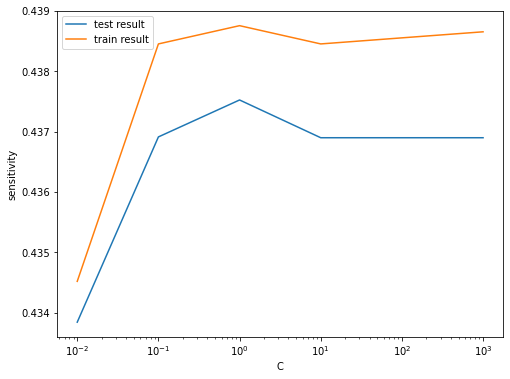

In [86]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [87]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.43752446236813397 at C = 1


Logistic regression with optimal C

In [88]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [89]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Predictions on the train set

In [90]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("----------------------- ")
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

[[43459   584]
 [ 2785  2171]]
----------------------- 
Accuracy:- 0.9312434947651993
Sensitivity:- 0.4380548829701372
Specificity:- 0.9867402311377518


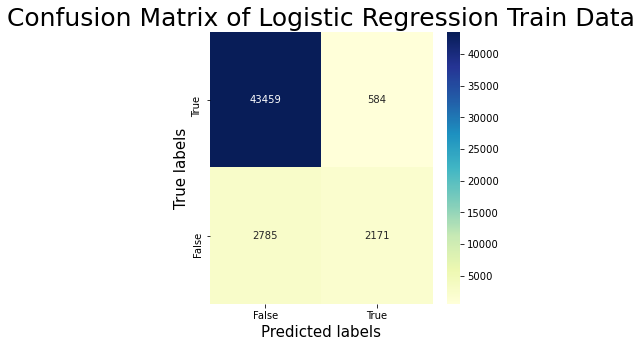

In [91]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Logistic Regression Train Data')

In [92]:
# Printing classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     44043
         1.0       0.79      0.44      0.56      4956

    accuracy                           0.93     48999
   macro avg       0.86      0.71      0.76     48999
weighted avg       0.92      0.93      0.92     48999



#### Predictions on the test set

In [93]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("----------------------- ")
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[18578   246]
 [ 1221   955]]
----------------------- 
Accuracy:- 0.9301428571428572
Sensitivity:- 0.43887867647058826
Specificity:- 0.9869315767105822


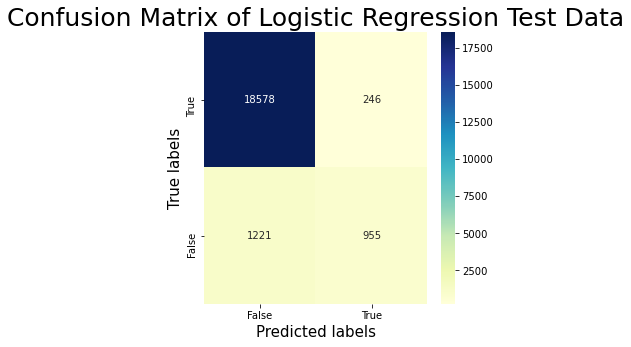

In [94]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Logistic Regression Test Data')

In [95]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     18824
         1.0       0.80      0.44      0.57      2176

    accuracy                           0.93     21000
   macro avg       0.87      0.71      0.76     21000
weighted avg       0.92      0.93      0.92     21000



##### Model summary

###### Train set
- Accuracy:- 0.9312434947651993
- Sensitivity:- 0.4380548829701372
- Specificity:- 0.9867402311377518

######  Test set
- Accuracy:- 0.9301428571428572
- Sensitivity:- 0.43887867647058826
- Specificity:- 0.9869315767105822

Overall, the model is performing well in both train and test data sets

### Decision Tree with PCA


Hyperparameter tuning

In [96]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [97]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.606654,0.078531,0.007545,0.001008,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.350151,0.424823,0.325933,0.362903,0.341070,0.360976,0.034122,5
1,1.734682,0.097692,0.007450,0.000772,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.350151,0.424823,0.325933,0.362903,0.341070,0.360976,0.034122,5
2,1.711043,0.030699,0.008824,0.001337,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.337033,0.410696,0.316852,0.356855,0.332997,0.350887,0.032506,7
3,1.694387,0.095585,0.008037,0.000787,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.337033,0.410696,0.316852,0.356855,0.332997,0.350887,0.032506,7
4,2.734461,0.022780,0.007337,0.000479,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.441978,0.489405,0.443996,0.426411,0.453078,0.450973,0.021044,1
5,2.779907,0.103728,0.007639,0.000764,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.441978,0.489405,0.443996,0.426411,0.453078,0.450973,0.021044,1
6,2.667196,0.088202,0.006835,0.000621,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.433905,0.454087,0.397578,0.430444,0.419778,0.427158,0.018498,3
7,2.620349,0.030882,0.006948,0.000329,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.433905,0.454087,0.397578,0.430444,0.419778,0.427158,0.018498,3


In [98]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.4509734790534162
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


Model with optimal hyperparameters

In [99]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=42)

#### Predictions on the train set

In [100]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print("------------------")
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[43211   832]
 [ 2370  2586]]
------------------
Accuracy:- 0.9346517275862772
Sensitivity:- 0.5217917675544794
Specificity:- 0.9811093703880299


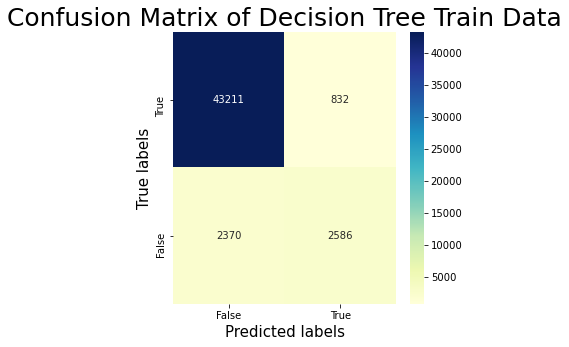

In [101]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Decision Tree Train Data')

#### Predictions on the test set

In [102]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("------------------")

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


[[18372   452]
 [ 1127  1049]]
------------------
Accuracy:- 0.9248095238095239
Sensitivity:- 0.4820772058823529
Specificity:- 0.9759881002974926


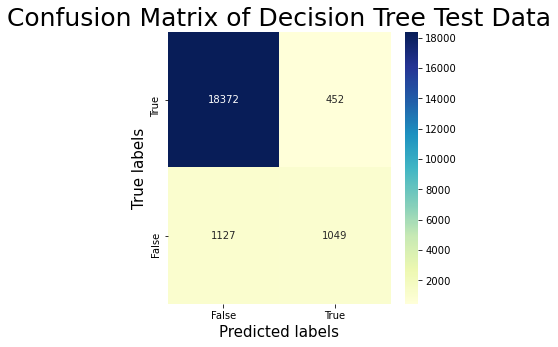

In [103]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Decision Tree Test Data')


##### Model summary

###### Train set
- Accuracy:- 0.9346109104267434
- Sensitivity:- 0.5042372881355932
- Specificity:- 0.9830393024998297

######  Test set
- Accuracy:- 0.9263333333333333
- Sensitivity:- 0.4733455882352941
- Specificity:- 0.9786974075648108

Overall, the model is performing well in the test set, what it had learnt from the train set.

## Random forest with PCA

In [104]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

In [105]:
from os.path import exists
if(exists('grid_search_best.pkl')):
    tfidf_params = joblib.load('grid_search_best.pkl')
    tfidf_params
else:
    # Fit the model
    grid_search.fit(X_train_pca, y_train)
    joblib.dump(grid_search.best_params_, 'grid_search_best.pkl', compress = 1) 
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
We can get accuracy of 0.9287740566134003 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [106]:
if(exists('grid_search_best.pkl')):
    gsb_data = joblib.load("grid_search_best.pkl")  

gsb_data

{'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [107]:
# model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=gsb_data["max_depth"],
                             min_samples_leaf=gsb_data["min_samples_leaf"], 
                             min_samples_split=gsb_data["min_samples_split"],
                             max_features=gsb_data["max_features"],
                             n_estimators=gsb_data["n_estimators"])

In [108]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction on the train set

In [109]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[43775   268]
 [ 3194  1762]]
Accuracy:- 0.9293454968468744
Sensitivity:- 0.3555286521388216
Specificity:- 0.9939150375769135


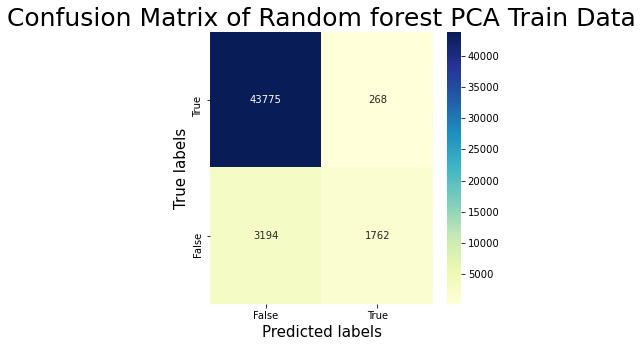

In [110]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Random forest PCA Train Data')


##### Prediction on the test set

In [111]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [112]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[18706   118]
 [ 1399   777]]
Accuracy:- 0.9277619047619048
Sensitivity:- 0.3570772058823529
Specificity:- 0.9937314067148322


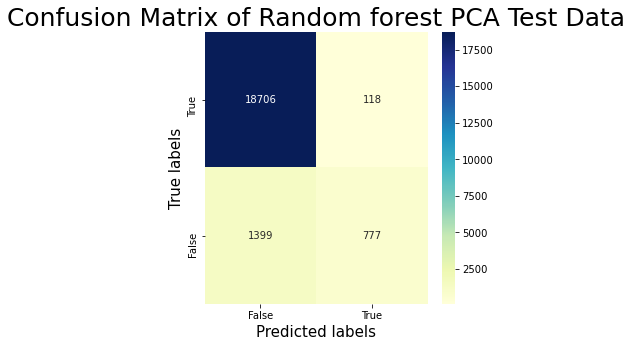

In [113]:
classes=[False,True]
confusion_matrix_plot(matrix = confusion,classes = classes, name='Random forest PCA Test Data')


***Model summary***

Train set
- Accuracy:- 0.9292230453682728
- Sensitivity:- 0.3553268765133172
- Specificity:- 0.9938015121585723

Test set
- Accuracy:- 0.9277619047619048
- Sensitivity:- 0.3552389705882353
- Specificity:- 0.9939439014024649
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is also not good at train set too. 

### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression models preforms good. For both the models the sensitivity was approx 70%. Also we have good accuracy of apporx 94%.

# Without PCA

## Logistic regression without PCA

In [114]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
# Fit the model
log_no_pca = log_no_pca.fit().summary()
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48862
Model Family:                Binomial   Df Model:                          136
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9077.7
Date:                Wed, 14 Sep 2022   Deviance:                       18155.
Time:                        23:32:08   Pearson chi2:                 2.41e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6712      0.044    -82.668      0.000      -3.758      -3.584
arpu_6                 0.1637      0.082      1.997      0.046       0.003       0.324
arpu_7                 0.1821      0.098      1.857      0.063      -0.010       0.374
arpu_8                 0.4890      0.108      4.547      0.000       0.278       0.700
onnet_mou_6            2.1707      1.769      1.227      0.220      -1.297       5.638
onnet_mou_7           -1.6022      1.033     -1.550      0.121      -3.628       0.423
onnet_mou_8           -1.0205      1.632     -0.625      0.532      -4.218       2.177
offnet_mou_6           2.3309      1.855      1.257      0.209      -1.304       5.966
offnet_mou_7          -1.8544      1.021     -1.816      0.069      -3.856       0.148
offnet_mou_8          -1.3032      1.655     -0.788      0.431      -4.546       1.940
roam_ic_mou_6          0.0454      0.022      2.079      0.038       0.003       0.088
roam_ic_mou_7          0.0370      0.024      1.516      0.130      -0.011       0.085
roam_ic_mou_8          0.0183      0.022      0.844      0.399      -0.024       0.061
roam_og_mou_6         -0.5088      0.413     -1.233      0.218      -1.318       0.300
roam_og_mou_7          0.3291      0.184      1.788      0.074      -0.032       0.690
roam_og_mou_8          0.3413      0.343      0.996      0.319      -0.330       1.013
loc_og_t2t_mou_6    -112.2866    607.041     -0.185      0.853   -1302.065    1077.492
loc_og_t2t_mou_7    1305.3364    635.520      2.054      0.040      59.741    2550.932
loc_og_t2t_mou_8    7597.8943    752.857     10.092      0.000    6122.322    9073.467
loc_og_t2m_mou_6    -114.7167    619.876     -0.185      0.853   -1329.652    1100.218
loc_og_t2m_mou_7    1255.7493    611.329      2.054      0.040      57.567    2453.932
loc_og_t2m_mou_8    6979.1759    691.558     10.092      0.000    5623.748    8334.604
loc_og_t2f_mou_6      -9.3944     50.662     -0.185      0.853    -108.691      89.902
loc_og_t2f_mou_7     109.0076     53.053      2.055      0.040       5.026     212.989
loc_og_t2f_mou_8     588.9463     58.353     10.093      0.000     474.576     703.316
loc_og_t2c_mou_6      -0.0253      0.027     -0.954      0.340      -0.077       0.027
loc_og_t2c_mou_7       0.0339      0.028      1.220      0.223      -0.021       0.088
loc_og_t2c_mou_8       0.0301      0.038      0.800      0.424      -0.044       0.104
loc_og_mou_6       -2190.2314   1242.154     -1.763      0.078   -4624.809     244.346
loc_og_mou_7       -3029.7239   1289.031     -2.350      0.019   -5556.178    -503.270
loc_og_mou_8       -5205.6677   1496.258     -3.479      0.001   -8138.280   -2273.055
std_og_t2t_mou_6   -3309.8872   1234.949     -2.680      0.007   -5730.344    -889.431
std_og_t2t_mou_7   -4845.0488   1362.9

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [115]:
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [116]:
# Intantiate RFE with 15 columns
rfe = RFE(logreg,n_features_to_select= 15)
# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8', 'og_others_8',
       'total_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2f_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8'],
      dtype='object')


### Model-1 with RFE selected columns

In [117]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48983
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9776.6
Date:                Wed, 14 Sep 2022   Deviance:                       19553.
Time:                        23:33:58   Pearson chi2:                 5.27e+07
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6622      0.046    -78.978      0.000      -3.753      -3.571
onnet_mou_7            1.0310      0.076     13.626      0.000       0.883       1.179
offnet_mou_7           1.2367      0.080     15.478      0.000       1.080       1.393
offnet_mou_8          -0.2885      0.046     -6.255      0.000      -0.379      -0.198
og_others_8           -1.3724      1.149     -1.194      0.232      -3.625       0.880
total_og_mou_7        -1.3988      0.116    -12.084      0.000      -1.626      -1.172
loc_ic_t2t_mou_8    1.375e+04    567.496     24.236      0.000    1.26e+04    1.49e+04
loc_ic_t2m_mou_8    1.545e+04    637.625     24.235      0.000    1.42e+04    1.67e+04
loc_ic_t2f_mou_8    3529.8709    145.659     24.234      0.000    3244.385    3815.357
loc_ic_mou_7           0.6331      0.044     14.265      0.000       0.546       0.720
loc_ic_mou_8       -2.361e+04    974.010    -24.238      0.000   -2.55e+04   -2.17e+04
std_ic_t2f_mou_8      -0.4558      0.131     -3.491      0.000      -0.712      -0.200
spl_ic_mou_8          -0.6675      0.023    -29.116      0.000      -0.712      -0.623
total_rech_num_8      -0.3381      0.035     -9.742      0.000      -0.406      -0.270
last_day_rch_amt_8    -0.4767      0.037    -13.051      0.000      -0.548      -0.405
fb_user_8             -0.4491      0.028    -16.247      0.000      -0.503      -0.395
======================================================================================
"""

#### Checking VIFs

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,loc_ic_mou_8,1.566995e+09
6,loc_ic_t2m_mou_8,6.715111e+08
5,loc_ic_t2t_mou_8,5.319258e+08
7,loc_ic_t2f_mou_8,3.503942e+07
4,total_og_mou_7,7.306000e+01
1,offnet_mou_7,3.360000e+01
0,onnet_mou_7,3.042000e+01
8,loc_ic_mou_7,3.490000e+00
2,offnet_mou_8,2.700000e+00
12,total_rech_num_8,1.370000e+00


As we can see from the model summary that all the variables p-values are significant except og_others_8 column. Hence, deleting og_others_8 column.

In [119]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8', 'total_og_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'fb_user_8']


### Model-2
Building the model after removing og_others_8 variable.

In [120]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48984
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9778.5
Date:                Wed, 14 Sep 2022   Deviance:                       19557.
Time:                        23:33:59   Pearson chi2:                 5.36e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6455      0.044    -83.193      0.000      -3.731      -3.560
onnet_mou_7            1.0324      0.076     13.644      0.000       0.884       1.181
offnet_mou_7           1.2381      0.080     15.496      0.000       1.082       1.395
offnet_mou_8          -0.2890      0.046     -6.262      0.000      -0.379      -0.199
total_og_mou_7        -1.4008      0.116    -12.101      0.000      -1.628      -1.174
loc_ic_t2t_mou_8    1.375e+04    567.493     24.227      0.000    1.26e+04    1.49e+04
loc_ic_t2m_mou_8    1.545e+04    637.622     24.226      0.000    1.42e+04    1.67e+04
loc_ic_t2f_mou_8    3528.6140    145.658     24.225      0.000    3243.129    3814.099
loc_ic_mou_7           0.6332      0.044     14.266      0.000       0.546       0.720
loc_ic_mou_8        -2.36e+04    974.005    -24.229      0.000   -2.55e+04   -2.17e+04
std_ic_t2f_mou_8      -0.4559      0.131     -3.492      0.000      -0.712      -0.200
spl_ic_mou_8          -0.6635      0.023    -29.297      0.000      -0.708      -0.619
total_rech_num_8      -0.3389      0.035     -9.768      0.000      -0.407      -0.271
last_day_rch_amt_8    -0.4769      0.037    -13.058      0.000      -0.549      -0.405
fb_user_8             -0.4489      0.028    -16.241      0.000      -0.503      -0.395
======================================================================================
"""

#### Checking VIF for Model-2

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,1.566994e+09
5,loc_ic_t2m_mou_8,6.715107e+08
4,loc_ic_t2t_mou_8,5.319256e+08
6,loc_ic_t2f_mou_8,3.503940e+07
3,total_og_mou_7,7.306000e+01
1,offnet_mou_7,3.360000e+01
0,onnet_mou_7,3.042000e+01
7,loc_ic_mou_7,3.490000e+00
2,offnet_mou_8,2.700000e+00
11,total_rech_num_8,1.370000e+00


In [122]:
# Removing loc_ic_mou_8 column as having higher VIF
log_cols.remove('loc_ic_mou_8')

### Model-3
Model after removing loc_ic_mou_8 column.

In [123]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48985
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10104.
Date:                Wed, 14 Sep 2022   Deviance:                       20207.
Time:                        23:33:59   Pearson chi2:                 6.56e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7640      0.048    -77.922      0.000      -3.859      -3.669
onnet_mou_7            1.1654      0.077     15.183      0.000       1.015       1.316
offnet_mou_7           1.3763      0.081     16.973      0.000       1.217       1.535
offnet_mou_8          -0.3408      0.048     -7.125      0.000      -0.435      -0.247
total_og_mou_7        -1.6060      0.118    -13.661      0.000      -1.836      -1.376
loc_ic_t2t_mou_8      -1.3979      0.120    -11.620      0.000      -1.634      -1.162
loc_ic_t2m_mou_8      -2.2028      0.097    -22.812      0.000      -2.392      -2.014
loc_ic_t2f_mou_8      -0.7426      0.099     -7.498      0.000      -0.937      -0.548
loc_ic_mou_7           0.6620      0.047     14.208      0.000       0.571       0.753
std_ic_t2f_mou_8      -0.5612      0.139     -4.027      0.000      -0.834      -0.288
spl_ic_mou_8          -0.9050      0.023    -38.590      0.000      -0.951      -0.859
total_rech_num_8      -0.3579      0.035    -10.277      0.000      -0.426      -0.290
last_day_rch_amt_8    -0.5077      0.037    -13.884      0.000      -0.579      -0.436
fb_user_8             -0.4440      0.027    -16.208      0.000      -0.498      -0.390
======================================================================================
"""

#### VIF Model-3

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_7,72.82
1,offnet_mou_7,33.49
0,onnet_mou_7,30.33
7,loc_ic_mou_7,3.48
2,offnet_mou_8,2.69
5,loc_ic_t2m_mou_8,2.09
4,loc_ic_t2t_mou_8,2.01
10,total_rech_num_8,1.37
6,loc_ic_t2f_mou_8,1.14
11,last_day_rch_amt_8,1.14


In [125]:
# Removing total_og_mou_7 column due to high p-value
log_cols.remove('total_og_mou_7')

### Model-4
Model after removing total_og_mou_7 column.

In [126]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48986
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10194.
Date:                Wed, 14 Sep 2022   Deviance:                       20388.
Time:                        23:34:00   Pearson chi2:                 1.73e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.7736      0.049    -77.226      0.000      -3.869      -3.678
onnet_mou_7            0.1480      0.018      8.282      0.000       0.113       0.183
offnet_mou_7           0.3360      0.026     12.714      0.000       0.284       0.388
offnet_mou_8          -0.3125      0.046     -6.804      0.000      -0.403      -0.223
loc_ic_t2t_mou_8      -1.4225      0.121    -11.726      0.000      -1.660      -1.185
loc_ic_t2m_mou_8      -2.2905      0.097    -23.547      0.000      -2.481      -2.100
loc_ic_t2f_mou_8      -0.7597      0.100     -7.610      0.000      -0.955      -0.564
loc_ic_mou_7           0.6478      0.047     13.849      0.000       0.556       0.740
std_ic_t2f_mou_8      -0.5512      0.139     -3.953      0.000      -0.824      -0.278
spl_ic_mou_8          -0.9139      0.024    -38.847      0.000      -0.960      -0.868
total_rech_num_8      -0.3552      0.034    -10.424      0.000      -0.422      -0.288
last_day_rch_amt_8    -0.4720      0.036    -13.141      0.000      -0.542      -0.402
fb_user_8             -0.4395      0.027    -16.148      0.000      -0.493      -0.386
======================================================================================
"""

In [127]:
#### VIF Model-4
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_7,3.48
2,offnet_mou_8,2.69
1,offnet_mou_7,2.45
4,loc_ic_t2m_mou_8,2.09
3,loc_ic_t2t_mou_8,2.01
9,total_rech_num_8,1.37
5,loc_ic_t2f_mou_8,1.14
10,last_day_rch_amt_8,1.14
0,onnet_mou_7,1.11
8,spl_ic_mou_8,1.09


Now all p-values and VIF values are in the desired range.
Hence, we can conclused that ***Model-4 log_no_pca_4 will be the final model***.

###  Model performance on the train set

In [128]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_4.predict(X_train_sm_4)
y_train_pred_no_pca.head()

18874    0.010792
34295    0.035560
42149    0.004093
52413    0.006550
4537     0.144630
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [129]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0.0,0.010792,0
1,0.0,0.035560,1
2,0.0,0.004093,2
3,0.0,0.006550,3
4,0.0,0.144630,4


##### Finding Optimal Probablity Cutoff Point

In [130]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.010792,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.035560,1,1,0,0,0,0,0,0,0,0,0
2,0.0,0.004093,2,1,0,0,0,0,0,0,0,0,0
3,0.0,0.006550,3,1,0,0,0,0,0,0,0,0,0
4,0.0,0.144630,4,1,1,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [131]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.101145     1.000000     0.000000
0.1          0.1  0.796139     0.833535     0.791931
0.2          0.2  0.920570     0.619451     0.954454
0.3          0.3  0.928529     0.461461     0.981087
0.4          0.4  0.929937     0.426957     0.986536
0.5          0.5  0.930876     0.416061     0.988806
0.6          0.6  0.931529     0.407183     0.990532
0.7          0.7  0.931672     0.396691     0.991872
0.8          0.8  0.926815     0.327078     0.994301
0.9          0.9  0.900978     0.023810     0.999682


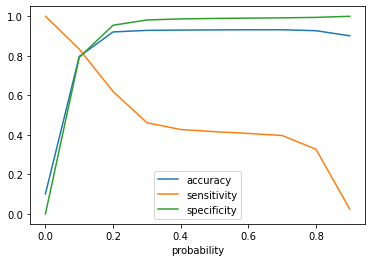

In [132]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy -  Increases with the increasing probablity.

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`Nearby point 0.2` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.2 as the optimum probability cutoff, we are taking ***0.17*** for acheiving higher sensitivity, which is our main goal.

In [133]:
# Creating a column with name "predicted", which is the predicted value for 0.17 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.17 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.0,0.010792,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.035560,1,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.004093,2,1,0,0,0,0,0,0,0,0,0,0
3,0.0,0.006550,3,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.144630,4,1,1,0,0,0,0,0,0,0,0,0


In [134]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[40622  3421]
 [ 1364  3592]]
Accuracy:- 0.9023449458152207
Sensitivity:- 0.7247780468119451
Specificity:- 0.9223259087709739


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [135]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

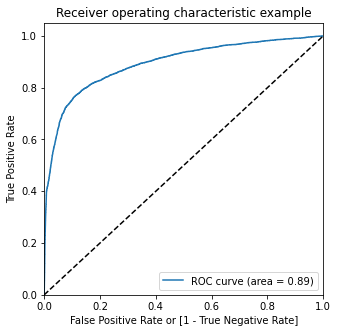

In [136]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area under the ROC curve is closer to 0.89, which is the Gini of the model.

### Evaluating the Model Performance on the test data set


In [140]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [141]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log[log_cols] )
X_test_sm.shape

(21000, 13)

In [142]:
X_train_sm_4.shape

(48999, 13)

##### Predictions on the test set with final model

In [143]:
# Predict on the test set
y_test_pred = log_no_pca_4.predict(X_test_sm)

In [144]:
y_test_pred.head()

59030    0.046733
38151    0.314279
69572    0.011581
62590    0.836515
57208    0.109520
dtype: float64

In [145]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
59030,0.046733
38151,0.314279
69572,0.011581
62590,0.836515
57208,0.109520


In [146]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
59030,1.0
38151,1.0
69572,0.0
62590,1.0
57208,1.0


In [147]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [148]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [149]:
y_test_pred_final.head()

,churn_probability,CustID,0
0,1.0,59030,0.046733
1,1.0,38151,0.314279
2,0.0,69572,0.011581
3,1.0,62590,0.836515
4,1.0,57208,0.109520


In [150]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [151]:
y_test_pred_final.head()

,churn_probability,CustID,churn_prob
0,1.0,59030,0.046733
1,1.0,38151,0.314279
2,0.0,69572,0.011581
3,1.0,62590,0.836515
4,1.0,57208,0.109520


In [152]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.1 else 0)

In [153]:
y_test_pred_final.head()

,churn_probability,CustID,churn_prob,test_predicted
0,1.0,59030,0.046733,0
1,1.0,38151,0.314279,1
2,0.0,69572,0.011581,0
3,1.0,62590,0.836515,1
4,1.0,57208,0.109520,1


##### Metrics

In [154]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted'])
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn_probability'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

[[15012  3812]
 [  325  1851]]
Accuracy:- 0.803
Sensitivity:- 0.8506433823529411
Specificity:- 0.7974925626859328


***Model summary***

- Train set
    - Accuracy:- 0.9023449458152207
    - Sensitivity:- 0.7247780468119451
    - Specificity:- 0.9223259087709739
- Test set
    - Accuracy:- 0.803
    - Sensitivity:- 0.8506433823529411
    - Specificity:- 0.7974925626859328

Overall, the model is performing well in the test set, what it had learnt from the train set.

In [155]:
# get importance
log_no_pca_4.params

const                -3.773610
onnet_mou_7           0.147995
offnet_mou_7          0.336017
offnet_mou_8         -0.312530
loc_ic_t2t_mou_8     -1.422540
loc_ic_t2m_mou_8     -2.290453
loc_ic_t2f_mou_8     -0.759691
loc_ic_mou_7          0.647845
std_ic_t2f_mou_8     -0.551171
spl_ic_mou_8         -0.913859
total_rech_num_8     -0.355163
last_day_rch_amt_8   -0.471957
fb_user_8            -0.439494
dtype: float64

In [156]:
log_no_pca_3.params

const                -3.764034
onnet_mou_7           1.165419
offnet_mou_7          1.376346
offnet_mou_8         -0.340832
total_og_mou_7       -1.605967
loc_ic_t2t_mou_8     -1.397860
loc_ic_t2m_mou_8     -2.202811
loc_ic_t2f_mou_8     -0.742558
loc_ic_mou_7          0.662035
std_ic_t2f_mou_8     -0.561158
spl_ic_mou_8         -0.904989
total_rech_num_8     -0.357887
last_day_rch_amt_8   -0.507699
fb_user_8            -0.443987
dtype: float64

## Decision tree without PCA

In [ ]:
# Create the parameter grid 
param_grid_no_pca = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150,50),
    'min_samples_split': range(50, 150,50),
}

# Instantiate the grid search model
dtree_nopca = DecisionTreeClassifier()

grid_search_dt_nopca = GridSearchCV(estimator = dtree_nopca, 
                           param_grid = param_grid_no_pca, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search_dt_nopca.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
grid_search_dt_nopca.best_estimator_

In [ ]:
dtnopcasearch = grid_search_dt_nopca.best_estimator_

# Model with optimal hyperparameters
dt_no_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=dtnopcasearch.max_depth, 
                                  min_samples_leaf=dtnopcasearch.min_samples_leaf,
                                  min_samples_split=dtnopcasearch.min_samples_split)

dt_no_pca_model.fit(X_train, y_train)

#### Predictions on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_no_pca_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

print("------------------")
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Printing classification report
print(classification_report(y_train, y_train_pred))

#### Predictions on the test set

In [ ]:
# Prediction on the test set
y_test_pred = dt_no_pca_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

print("------------------")

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


In [ ]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
pd.DataFrame({
    'Feature': X_test.columns,
    'Importance':dt_no_pca_model.feature_importances_}).sort_values(by='Importance',ascending=False).head()


## Random forest without PCA

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf_no_pca_model = RandomForestClassifier()

# Instantiate the grid search model
grid_no_pca_search = GridSearchCV(estimator = rf_no_pca_model, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

In [ ]:
if(exists('grid_no_pca_search_best.pkl')):
    grid_no_pca_search_best = joblib.load('grid_no_pca_search_best.pkl')
    print(grid_no_pca_search_best)
else:
    # Fit the model
    grid_no_pca_search.fit(X_train, y_train)
    joblib.dump(grid_no_pca_search.best_params_, 'grid_no_pca_search_best.pkl', compress = 1) 
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_no_pca_search.best_score_,'using',grid_no_pca_search.best_params_)


In [ ]:
# model with the best hyperparameters
rf_no_pca = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             max_features=20,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [ ]:
rf_no_pca.fit(X_train,y_train)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rf_no_pca.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Printing classification report
print(classification_report(y_train, y_train_pred))

##### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = rf_no_pca.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
pd.DataFrame({
    'Feature':X_test.columns,
    'Importance':rf_no_pca.feature_importances_}).sort_values(by='Importance',ascending=False).head(7)

## Random forest without PCA And Hyper Tuning

In [ ]:
rf_no_pca_class = RandomForestClassifier()
rf_no_pca_class.fit(X_train,y_train)

In [ ]:
# Predictions on the train set
y_train_pred = rf_no_pca_class.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Prediction on the test set
y_test_pred = rf_no_pca_class.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Printing classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
pd.DataFrame({
    'Feature':X_test.columns,
    'Importance':rf_no_pca_class.feature_importances_}).sort_values(by='Importance',ascending=False).head()

#### Final conclusion with no PCA

- We can see that the random forest model with no PCA has good sensitivity and accuracy in comparsion to the models with PCA. 
- We will go for the model such as random forest with no PCA as it expliains the important predictor variables as well as the significance of each variable. 
- The model also helps us to identify the variables which should be act upon for making the decision of the to be churned customers. 

##### The best model built is using Random Forest without PCA with 94.70% accuracy, 60.57% Sensitivity and 98.65% Specificity.

#### Top predictors

Below are top variables selected in the Random Forest regression model.

In [ ]:
top30 = pd.DataFrame({'Feature':X_test.columns,  'Importance':rf_no_pca_class.feature_importances_}).sort_values(by='Importance',ascending=False).head(30)
top30 = top30.reset_index(drop = True)
top30

In [ ]:
# Creating a copy of data set with only the 30 most important features
top_col = list(top30['Feature'])
imp_var = churn_train_data[top_col]
imp_var.head()

In [ ]:
# plot feature correlation of most imprortant 30 features
plt.figure(figsize = (20,20))
sns.heatmap(data=imp_var.corr(), annot = True, cmap = "Blues")
plt.show()

In [ ]:
# Checking for list of churn which are not equal to final model predicted churn 
checkmodel = pd.DataFrame(y_train_pred_final.loc[(y_train_pred_final['churn'] != y_train_pred_final['predicted'])] )
# Compare length of model
print('checkmodel: '+ str(len(checkmodel)))
print('y_train_pred_final: '+ str(len(y_train_pred_final)))

### Using the Best Model (RF without PCA) on unseen data (test data.csv) to make predictions

In [ ]:
churn_original_test_data.isnull().sum()

In [ ]:
# get columns used for training in train data from test data
churn_test_data = churn_original_test_data[cols_scale]
churn_test_data.shape

In [ ]:
# chechk % of null value in data
percent_null = churn_test_data.isnull().sum().sum() / np.product(churn_test_data.shape) * 100
percent_null

In [ ]:
# Imputing missing values with zero
to_fill = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
churn_test_data[to_fill] = churn_test_data[to_fill].fillna(0)

In [ ]:
cat_col = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
churn_test_data[cat_col] = churn_test_data[cat_col].fillna(-1)

In [ ]:
cat_col = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
for i in range(len(cat_col)):
    churn_test_data[cat_col[i]] =   churn_test_data[cat_col[i]].astype('int64')

In [ ]:
imputer = IterativeImputer(missing_values=np.nan, random_state=0, verbose = 2, max_iter = 5)
churn_imputed_test = imputer.fit_transform(churn_test_data)
churn_imputed_test

In [ ]:
churn_test_data = pd.DataFrame(churn_imputed_test, columns=churn_test_data.columns)
churn_test_data.head()

In [ ]:
churn_test_data.isnull().sum().sum()

In [ ]:
# Transforming test data.
churn_test_data = pd.DataFrame(scaler.transform(churn_test_data),columns = churn_test_data.columns)
# Best model to predict test data
probabilities = rf_no_pca.predict(churn_test_data)

In [ ]:
print(probabilities.shape)
print(len(churn_original_test_data['id']))

In [ ]:
submission = pd.DataFrame({'id':churn_original_test_data['id'],'churn_probability':probabilities})
submission.head()

In [ ]:
submission['churn_probability'] = submission['churn_probability'].astype('int64')
submission.dtypes

In [ ]:
#Save to csv file
submission.to_csv('Submission.csv',index=False)

##### Read Submission CSV file to find churn prob count

In [ ]:
submission_data = pd.read_csv("Submission.csv")

In [ ]:
submission_data_churn = submission_data[submission_data['churn_probability'] == 1]
submission_data_not_churn = submission_data[submission_data['churn_probability'] == 0]

In [ ]:
# Predictions
print(len(submission_data_churn), len(submission_data_not_churn))

In [ ]:
# Finding out churn/non churn percentage
print("Chrun: ", len(submission_data_churn)/len(submission_data), "\t Not churn: ", len(submission_data_not_churn)/len(submission_data))
((submission_data['churn_probability'].value_counts()/len(churn_train_data))*100).plot(kind="bar")
plt.show()

In [ ]:
# Filtering the test dataset based on the most important 30 variables identified earlier
test = churn_test_data[top_col]
test.head()

In [ ]:
# merging the test dataset and the predictions
test['churn_probability']= submission_data['churn_probability']
print(test.shape)
test.head()

In [ ]:
# Checking Correlation between target variable(Churn Probability) and the independent variables in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(test.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlation with Churn variable", fontsize=15)

### Conclusions
From all the above analysis and observations we can arrive at the following insights for the Telecom Company:
- The most important factor leading to customer change is higher Roaming Charges.
- Higher roaming rates can lead to loss of customers from the roaming zone. 
- Thus company need to take necessary steps like reducing roaming rate, or providing special offers to retain the customers from roaming zone.
